In [ ]:
——!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 35.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Load Data and Pre-processing in General

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/MyDrive/5153_GP'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/MyDrive/5153_GP
/content/gdrive/MyDrive/5153_GP


In [ ]:
import datasets
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech')
df = dataset['train'].to_pandas()
print(df.shape)
df.describe()


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


(135556, 131)


,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,hatespeech,hate_speech_score,infitms,outfitms,annotator_severity,std_err,annotator_infitms,annotator_outfitms,hypothesis,annotator_age
count,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.00000,135556.000000,135556.000000,135556.000000,135556.000000,...,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135556.000000,135451.000000
mean,23530.416138,5567.097812,1.281352,2.954307,2.828875,2.56331,2.278638,2.698575,1.846211,1.052045,...,0.744733,-0.567428,1.034322,1.001052,-0.018817,0.300588,1.007158,1.011841,0.014589,37.910772
std,12387.194125,3230.508937,1.023542,1.231552,1.309548,1.38983,1.370876,0.898500,1.402372,1.345706,...,0.932260,2.380003,0.496867,0.791943,0.487261,0.236380,0.269876,0.675863,0.613006,11.641276
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-8.340000,0.100000,0.070000,-1.820000,0.020000,0.390000,0.280000,-1.578693,18.000000
25%,18148.000000,2719.000000,0.000000,2.000000,2.000000,2.00000,1.000000,2.000000,1.000000,0.000000,...,0.000000,-2.330000,0.710000,0.560000,-0.380000,0.030000,0.810000,0.670000,-0.341008,29.000000
50%,20052.000000,5602.500000,1.000000,3.000000,3.000000,3.00000,3.000000,3.000000,2.000000,0.000000,...,0.000000,-0.340000,0.960000,0.830000,-0.020000,0.340000,0.970000,0.850000,0.110405,35.000000
75%,32038.250000,8363.000000,2.000000,4.000000,4.000000,4.00000,3.000000,3.000000,3.000000,2.000000,...,2.000000,1.410000,1.300000,1.220000,0.350000,0.420000,1.170000,1.130000,0.449555,45.000000
max,50070.000000,11142.000000,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,...,2.000000,6.300000,5.900000,9.000000,1.360000,1.900000,2.010000,9.000000,0.987511,81.000000


In [ ]:
df.head(5)

In [ ]:
columns_to_keep = ['comment_id', 'status', 'violence', 'genocide', 'dehumanize', 'humiliate', 'text']
df = df[columns_to_keep]
df.rename(columns={'text': 'speeches'}, inplace=True)
df

<ipython-input-16-e205e80c6ab1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'text': 'speeches'}, inplace=True)


,comment_id,status,violence,genocide,dehumanize,humiliate,speeches
0,47777,2.0,0.0,0.0,0.0,0.0,Yes indeed. She sort of reminds me of the elde...
1,39773,2.0,0.0,0.0,0.0,0.0,The trans women reading this tweet right now i...
2,47101,4.0,0.0,0.0,4.0,4.0,Question: These 4 broads who criticize America...
3,43625,2.0,0.0,0.0,0.0,1.0,It is about time for all illegals to go back t...
4,12538,4.0,4.0,1.0,4.0,4.0,For starters bend over the one in pink and kic...
...,...,...,...,...,...,...,...
135551,37080,2.0,0.0,0.0,0.0,0.0,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...
135552,22986,2.0,0.0,0.0,0.0,0.0,Millions of #Yemen-is participated in mass ral...
135553,21008,1.0,0.0,0.0,0.0,1.0,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...
135554,22986,2.0,0.0,0.0,0.0,0.0,Millions of #Yemen-is participated in mass ral...


In [ ]:
# df.to_csv('filted_data.csv', index=False)
df = pd.read_csv('filted_data.csv')

In [ ]:
def change_labels(label):
    if label in [0]:
        return 0
    else:
        return 1


for col in ['status', 'violence', 'genocide', 'dehumanize', 'humiliate']:
    df[col] = df[col].apply(change_labels)

In [ ]:
df

,comment_id,status,violence,genocide,dehumanize,humiliate,speeches
0,47777,1,0,0,0,0,Yes indeed. She sort of reminds me of the elde...
1,39773,1,0,0,0,0,The trans women reading this tweet right now i...
2,47101,1,0,0,1,1,Question: These 4 broads who criticize America...
3,43625,1,0,0,0,1,It is about time for all illegals to go back t...
4,12538,1,1,1,1,1,For starters bend over the one in pink and kic...
...,...,...,...,...,...,...,...
135551,37080,1,0,0,0,0,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...
135552,22986,1,0,0,0,0,Millions of #Yemen-is participated in mass ral...
135553,21008,1,0,0,0,1,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...
135554,22986,1,0,0,0,0,Millions of #Yemen-is participated in mass ral...


In [ ]:
# group by using mode first, if there is no mode, we will continuously use mean value
import pandas as pd
import numpy as np

def mode_or_mean(series):
    mode_value = series.mode().iloc[0] if not series.mode().empty else np.nan
    if not pd.isnull(mode_value):
        return mode_value
    else:
        return round(series.mean())

columns_to_aggregate = ['status', 'violence', 'genocide', 'dehumanize', 'humiliate']

# Group by 'comment_id' and 'speeches', aggregate using custom function
df_grouped = df.groupby(['comment_id', 'speeches'], as_index=False)[columns_to_aggregate].agg(mode_or_mean)

# Optionally, round the aggregated values
df_grouped[columns_to_aggregate] = df_grouped[columns_to_aggregate].round().astype(int)

df_grouped

,comment_id,speeches,status,violence,genocide,dehumanize,humiliate
0,1,White people are trash.,1,0,0,1,1
1,2,"You've caught the big gay, it's known to be ai...",1,0,0,1,1
2,3,"I'm not saying you said that, I'm just saying ...",1,0,0,1,1
3,4,Donald Trump. Yeet myself off a building onto ...,1,0,0,1,1
4,5,Fabrice Fabrice is ostensibly black or black/l...,1,0,0,1,1
...,...,...,...,...,...,...,...
39560,50066,Good you Americans are annoying asf. I Wish mo...,1,1,1,1,1
39561,50067,Go to streets of the USA and our kids and vets...,1,1,1,1,1
39562,50068,That Kenyan girl is gorgeous!,1,0,0,0,0
39563,50069,Yikes!!! Bad enough she'shard to look at.every...,1,1,0,1,1


In [ ]:
df_grouped.to_csv('group_filted_data_01.csv', index=False)
df_grouped = pd.read_csv('group_filted_data_01.csv')

# EDA


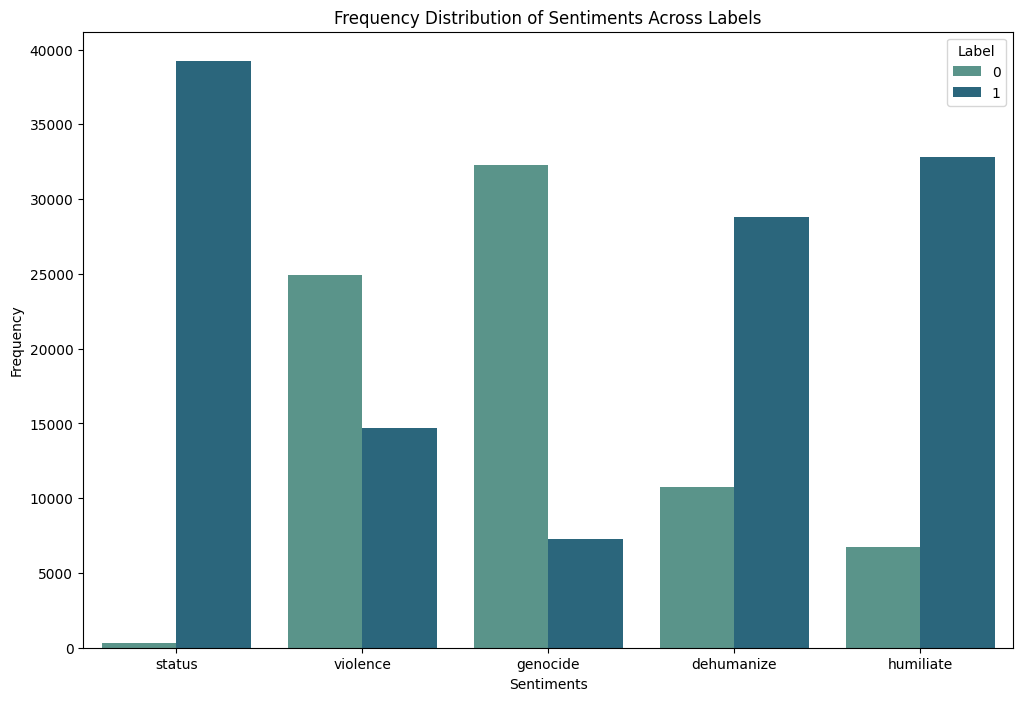

In [ ]:
# Frequency Distribution of Sentiments Across ['status', 'violence', 'genocide', 'dehumanize', 'humiliate']
columns_to_aggregate = ['status', 'violence', 'genocide', 'dehumanize', 'humiliate']

plot_data = pd.DataFrame({
    col: df_grouped[col].value_counts().sort_index() for col in columns_to_aggregate
}).fillna(0).astype(int).T

plot_data.reset_index(inplace=True)
plot_data_melted = pd.melt(plot_data, id_vars=['index'], value_vars=plot_data.columns[1:],
                           var_name='Label', value_name='Frequency')

plt.figure(figsize=(12, 8))
sns.barplot(x='index', y='Frequency', hue='Label', data=plot_data_melted, palette='crest')

plt.title('Frequency Distribution of Sentiments Across Labels')
plt.xlabel('Sentiments')
plt.ylabel('Frequency')
plt.legend(title='Label')

plt.show()

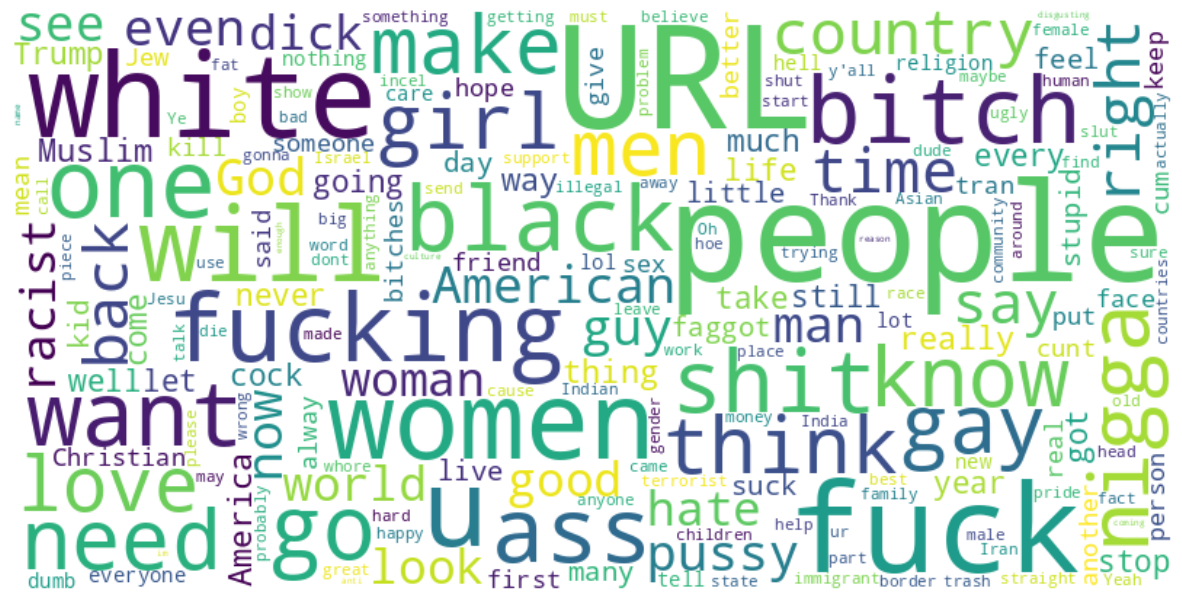

In [ ]:
# ÷

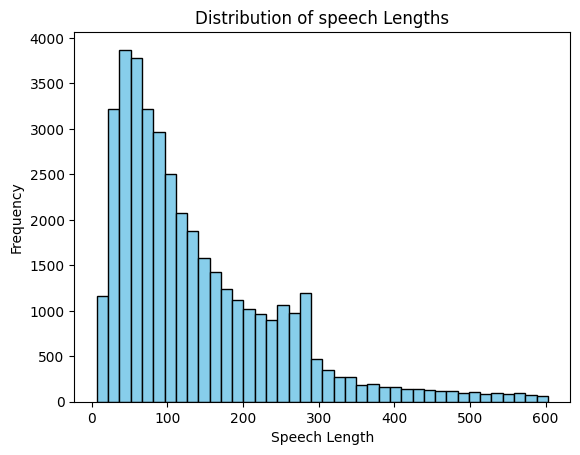

In [ ]:
speech_lengths = df_grouped['speeches'].apply(len)
plt.hist(speech_lengths, bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Speech Length')
plt.ylabel('Frequency')
plt.title('Distribution of speech Lengths')
plt.show()

**The reason why we want to see the length here is because in the subsequent tokenize, since distilbert is the same as bert, the maximum length that can only be accepted for each sample is 512, so we want to visualize the length first. We found that there are not many samples larger than 512, so in the subsequent dataloader, we directly truncate samples with more than 512 tokens.**

# Pre-processing the data for using distilbert and Data Loader


In [ ]:
df_grouped = pd.read_csv('group_filted_data_01.csv')

In [ ]:
import torch
from transformers import DistilBertModel, DistilBertTokenizer
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch import nn
from sklearn.model_selection import train_test_split

In [ ]:
df_grouped.drop('comment_id', axis=1, inplace=True)
df_grouped

,speeches,status,violence,genocide,dehumanize,humiliate
0,White people are trash.,1,0,0,1,1
1,"You've caught the big gay, it's known to be ai...",1,0,0,1,1
2,"I'm not saying you said that, I'm just saying ...",1,0,0,1,1
3,Donald Trump. Yeet myself off a building onto ...,1,0,0,1,1
4,Fabrice Fabrice is ostensibly black or black/l...,1,0,0,1,1
...,...,...,...,...,...,...
39560,Good you Americans are annoying asf. I Wish mo...,1,1,1,1,1
39561,Go to streets of the USA and our kids and vets...,1,1,1,1,1
39562,That Kenyan girl is gorgeous!,1,0,0,0,0
39563,Yikes!!! Bad enough she'shard to look at.every...,1,1,0,1,1


In [ ]:
# Load the fine-tuned model
model_name = "distilbert-base-uncased"

# Load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(model_name)

In [ ]:
columns_to_aggregate = ['status', 'violence', 'genocide', 'dehumanize', 'humiliate']

In [ ]:
from sklearn.model_selection import train_test_split

# train, validation, test: 40-30-30
df_train, df_test = train_test_split(df_grouped, test_size=0.6, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)
df_train.shape, df_val.shape, df_test.shape

# --------------------------------------------------------------------------------------------------

# df_train = df_grouped.sample(n=4000, random_state=42)
# df_remaining = df_grouped.drop(df_train.index)
# df_val = df_remaining.sample(n=2000, random_state=42)
# df_test = df_grouped.drop(df_val.index)
# df_train.shape, df_val.shape, df_test.shape

((15826, 6), (11869, 6), (11870, 6))

In [ ]:
class SpeechDatasetSingleTarget(Dataset):
    def __init__(self, speeches, target, tokenizer, max_len):
        self.speeches = speeches
        self.target = target
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.speeches)

    def __getitem__(self, item):
        speech = str(self.speeches[item])
        target = self.target[item]

        encoding = self.tokenizer.encode_plus(
            speech,
            add_special_tokens=True,
            max_length = 512,
            padding = 'max_length',
            truncation = True,
            return_attention_mask = True,
            return_tensors = 'pt',)

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'target': torch.tensor(target, dtype = torch.float)
        }


In [ ]:
def create_data_loader(df, target_column, tokenizer, max_len, batch_size):
  target = df[target_column].to_numpy()
  ds = SpeechDatasetSingleTarget(
    speeches = df.speeches.to_numpy(),
    target = target,
    tokenizer = tokenizer,
    max_len = max_len
  )

  return DataLoader(ds, batch_size = batch_size)



# Prepare DistilBert Model

In [ ]:
# class SentimentClassifier(nn.Module):
#   def __init__(self, n_classes):
#     super(SentimentClassifier, self).__init__()
#     self.distilbert = DistilBertModel.from_pretrained(model_name)
#     self.drop = nn.Dropout(p=0.3)
#     self.out = nn.Linear(self.distilbert.config.hidden_size, n_classes)

#   def forward(self, input_ids, attention_mask):
#     output = self.distilbert(
#         input_ids = input_ids,
#         attention_mask = attention_mask
#     )
#     pooled_output = output.last_hidden_state[:, 0]
#     output = self.drop(pooled_output)
#     logits = self.out(output)
#     outputs = 4 * torch.sigmoid(logits)
#     return outputs

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class SentimentClassifier(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.distilbert = DistilBertModel.from_pretrained(model_name)
    self.drop = nn.Dropout(p=0.5)
    self.out = nn.Linear(self.distilbert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    output = self.distilbert(
        input_ids = input_ids,
        attention_mask = attention_mask
    )
    pooled_output = output.last_hidden_state[:, 0]
    output = self.drop(pooled_output)
    return torch.sigmoid(self.out(output))


In [ ]:
# 'status', 'violence', 'genocide', 'dehumanize', 'humiliate'
status_model = SentimentClassifier(1).to(device)
violence_model = SentimentClassifier(1).to(device)
genocide_model = SentimentClassifier(1).to(device)
dehumanize_model = SentimentClassifier(1).to(device)
humiliate_model = SentimentClassifier(1).to(device)

# Training

In [ ]:
from transformers import get_linear_schedule_with_warmup, AdamW
from collections import defaultdict
import os


In [ ]:
EPOCHS = 5
BATCH_SIZE = 16

models = [status_model, violence_model, genocide_model, dehumanize_model, humiliate_model]
target_columns = ['status', 'violence', 'genocide', 'dehumanize', 'humiliate']

loss_fn = nn.BCELoss().to(device)
model_save_folder = path_to_file

In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
    model = model.train()

    losses = []
    correct_predictions = 0

    for d in data_loader:
        input_ids = d["input_ids"].to(device)
        attention_mask = d["attention_mask"].to(device)
        target = d["target"].float().to(device)  # 确保target为float类型

        outputs = model(
          input_ids=input_ids,
          attention_mask=attention_mask
        ).squeeze()  # 确保outputs是一维的，便于计算BCELoss

        preds = outputs > 0.5  # 使用0.5作为阈值来确定预测类别
        loss = loss_fn(outputs, target)

        correct_predictions += torch.sum(preds == target.bool()).item()  # 计算正确预测的数量
        losses.append(loss.item())

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        optimizer.zero_grad()

    train_acc = correct_predictions / n_examples
    train_acc = train_acc.detach().cpu().numpy() if isinstance(train_acc, torch.Tensor) else train_acc

    return train_acc, np.mean(losses)


In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for d in data_loader:
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            target = d["target"].float().to(device)  # 确保target为float类型

            outputs = model(
                input_ids = input_ids,
                attention_mask = attention_mask
            ).squeeze()  # 确保outputs是一维的，便于计算BCELoss

            preds = outputs > 0.5  # 使用0.5作为阈值来确定预测类别
            loss = loss_fn(outputs, target)

            correct_predictions += torch.sum(preds == target.bool()).item()  # 计算正确预测的数量
            losses.append(loss.item())

    val_acc = correct_predictions / n_examples
    val_acc = val_acc.detach().cpu().numpy() if isinstance(val_acc, torch.Tensor) else val_acc

    return val_acc, np.mean(losses)


In [ ]:
MAX_LEN = 512

In [ ]:
def train_col(column_name, model):
  train_data_loader = create_data_loader(df_train, column_name, tokenizer, MAX_LEN, BATCH_SIZE)
  val_data_loader = create_data_loader(df_val, column_name, tokenizer, MAX_LEN, BATCH_SIZE)
  test_data_loader = create_data_loader(df_test, column_name, tokenizer, MAX_LEN, BATCH_SIZE)


  optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-2)
  total_steps = len(train_data_loader) * EPOCHS

  scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps = 0,
    num_training_steps = total_steps
  )

  print(f"Training for column: {column_name}")
  history = defaultdict(list)
  best_accuracy = 0

  for epoch in range(EPOCHS):

    print(f'Epoch {epoch + 1}/{EPOCHS}')
    print('-' * 10)

    train_acc, train_loss = train_epoch(
      model,
      train_data_loader,
      loss_fn,
      optimizer,
      device,
      scheduler,
      len(df_train)
    )

    print(f'Train loss {train_loss} accuracy {train_acc}')

    val_acc, val_loss = eval_model(
      model,
      val_data_loader,
      loss_fn,
      device,
      len(df_val)
    )

    print(f'Val   loss {val_loss} accuracy {val_acc}')
    print()

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)

    if val_acc > best_accuracy:
      model_save_path = os.path.join(model_save_folder, f"best_model_{column_name}_01.bin")
      torch.save(model.state_dict(), model_save_path)
      best_accuracy = val_acc


  return history, test_data_loader


Training for column: status
Epoch 1/5
----------
Train loss 0.04718580736879805 accuracy 0.9923543535953494
Val   loss 0.048594527245898335 accuracy 0.9916589434661723

Epoch 2/5
----------
Train loss 0.04325682946099815 accuracy 0.9927334765575635
Val   loss 0.05235135570235018 accuracy 0.9916589434661723

Epoch 3/5
----------
Train loss 0.033389109683768695 accuracy 0.9927334765575635
Val   loss 0.05760556617952542 accuracy 0.9916589434661723

Epoch 4/5
----------
Train loss 0.017213160029878237 accuracy 0.9965247061797042
Val   loss 0.06716190757115549 accuracy 0.9901423877327492

Epoch 5/5
----------
Train loss 0.010818324434012998 accuracy 0.9980411980285606
Val   loss 0.06701570685232837 accuracy 0.9911534248883647

Training for column: violence
Epoch 1/5
----------
Train loss 0.5806966749556137 accuracy 0.6969543788702136
Val   loss 0.5457142483834629 accuracy 0.7259246777319066

Epoch 2/5
----------
Train loss 0.4549577893407056 accuracy 0.7907873120181979
Val   loss 0.60713766

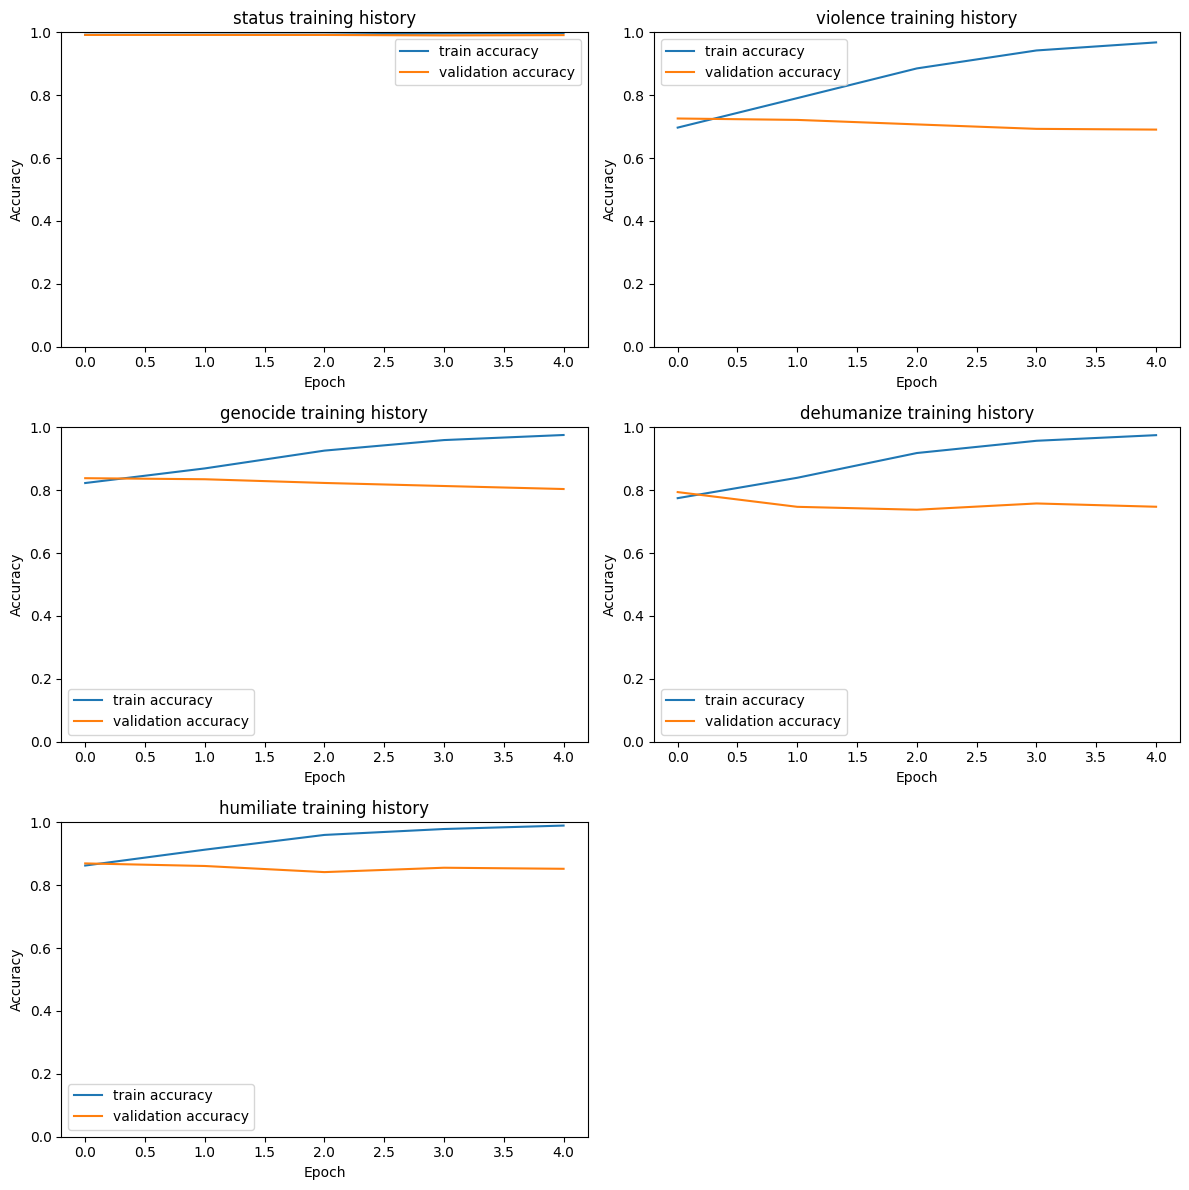

In [ ]:
histories = []
test_data_loaders = []

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, model in enumerate(models):
    if idx < 5:
        column_name = target_columns[idx]
        history, test_data_loader = train_col(column_name, model)
        histories.append(history)
        test_data_loaders.append(test_data_loader)

        axes[idx].plot(history['train_acc'], label='train accuracy')
        axes[idx].plot(history['val_acc'], label='validation accuracy')

        axes[idx].set_title(column_name + ' training history')
        axes[idx].set_ylabel('Accuracy')
        axes[idx].set_xlabel('Epoch')
        axes[idx].legend()
        axes[idx].set_ylim([0, 1])

axes[5].axis('off')

plt.tight_layout()
plt.show()

# For Test Data

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
    model = model.eval()

    losses = []
    correct_predictions = 0

    with torch.no_grad():
        for i, d in enumerate(data_loader):  # 添加索引以追踪进度
            input_ids = d["input_ids"].to(device)
            attention_mask = d["attention_mask"].to(device)
            target = d["target"].float().to(device)

            outputs = model(
                input_ids = input_ids,
                attention_mask = attention_mask
            ).squeeze()

            preds = outputs > 0.5  # 使用0.5作为阈值来确定预测类别
            loss = loss_fn(outputs, target)

            correct_predictions += torch.sum(preds == target)
            losses.append(loss.item())

            if (i + 1) % 100 == 0:  # 每处理100个样本打印一次
                print(f"Processed {i + 1}/{len(data_loader)} batches.")

    val_acc = correct_predictions.double() / n_examples
    val_acc = val_acc.detach().cpu().numpy()

    return val_acc, np.mean(losses)


In [ ]:
model_names = ['status', 'violence', 'genocide', 'dehumanize', 'humiliate']
best_models = []

for name in model_names:
    model_path = os.path.join(model_save_folder, f"best_model_{name}_01.bin")
    best_model = SentimentClassifier(1).to(device)
    best_model.load_state_dict(torch.load(model_path))
    best_model.eval()
    best_models.append(best_model)

distilbert_test_scores = {}
for idx, model in enumerate(best_models):
    test_data_loader = test_data_loaders[idx]
    test_acc, _ = eval_model(
        model,
        test_data_loader,
        loss_fn,
        device,
        len(df_test)
    )
    distilbert_test_scores[model_names[idx]] = test_acc.item()
    print(f"Test score of {model_names[idx]}: {test_acc.item()}")

Processed 100/742 batches.
Processed 200/742 batches.
Processed 300/742 batches.
Processed 400/742 batches.
Processed 500/742 batches.
Processed 600/742 batches.
Processed 700/742 batches.
Test score of status: 0.9896377422072452
Processed 100/742 batches.
Processed 200/742 batches.
Processed 300/742 batches.
Processed 400/742 batches.
Processed 500/742 batches.
Processed 600/742 batches.
Processed 700/742 batches.
Test score of violence: 0.7149957877000842
Processed 100/742 batches.
Processed 200/742 batches.
Processed 300/742 batches.
Processed 400/742 batches.
Processed 500/742 batches.
Processed 600/742 batches.
Processed 700/742 batches.
Test score of genocide: 0.8382476832350464
Processed 100/742 batches.
Processed 200/742 batches.
Processed 300/742 batches.
Processed 400/742 batches.
Processed 500/742 batches.
Processed 600/742 batches.
Processed 700/742 batches.
Test score of dehumanize: 0.7892165122156698
Processed 100/742 batches.
Processed 200/742 batches.
Processed 300/742 

In [ ]:
for name, score in distilbert_test_scores.items():
    print(f"{name}: {score}")

status: 0.9896377422072452
violence: 0.7149957877000842
genocide: 0.8382476832350464
dehumanize: 0.7892165122156698
humiliate: 0.8725358045492839


# Compare the test score with SVM

In [ ]:
import pandas as pd

In [ ]:
distilbert_test_scores = {
    'status': 0.9896377422072452,
    'violence': 0.7149957877000842,
    'genocide': 0.8382476832350464,
    'dehumanize': 0.7892165122156698,
    'humiliate': 0.8725358045492839
}


In [ ]:
distilbert_test_scores = pd.DataFrame(list(distilbert_test_scores.items()), columns=['Category', 'Accuracy Score'])
distilbert_test_scores['Category'] = distilbert_test_scores['Category'].apply(lambda x: x)

In [ ]:
svm_test_scores = pd.read_csv('svm_test_scores.csv')

svm_test_scores['Model'] = 'SVM'
distilbert_test_scores['Model'] = 'DistilBERT'

combined_test_score = pd.concat([svm_test_scores, distilbert_test_scores], ignore_index=True)


In [ ]:
distilbert_test_scores

,Category,Accuracy Score,Model
0,status,0.989638,DistilBERT
1,violence,0.714996,DistilBERT
2,genocide,0.838248,DistilBERT
3,dehumanize,0.789217,DistilBERT
4,humiliate,0.872536,DistilBERT


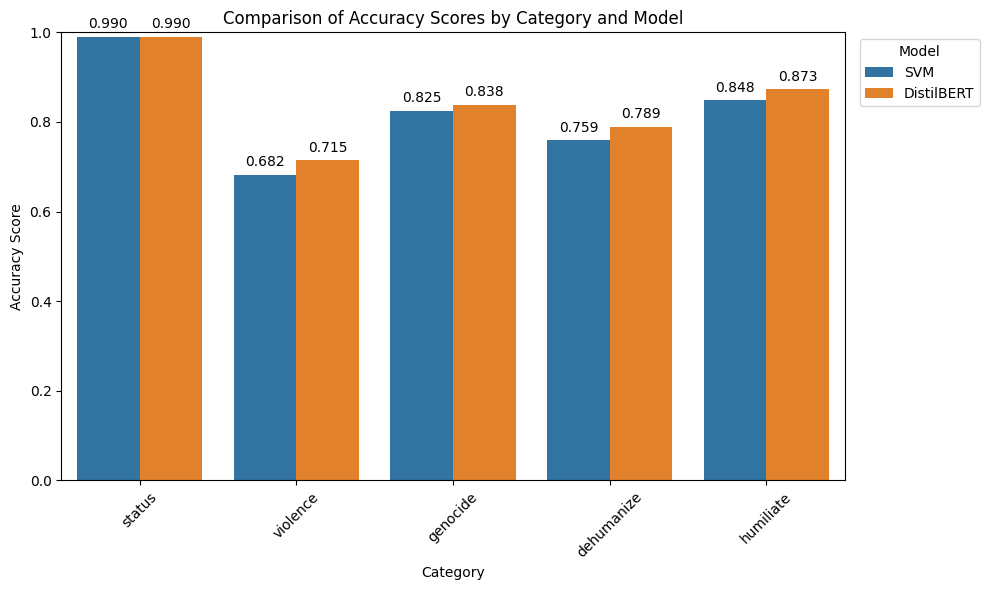

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Category', y='Accuracy Score', hue='Model', data=combined_test_score)

plt.title('Comparison of Accuracy Scores by Category and Model')
plt.xlabel('Category')
plt.ylabel('Accuracy Score')

plt.ylim(0, 1)

for p in bar_plot.patches:
    if p.get_height() > 0:
        bar_plot.annotate(format(p.get_height(), '.3f'),
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha = 'center', va = 'center',
                          xytext = (0, 9),
                          textcoords = 'offset points')

plt.legend(title='Model', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.xticks(rotation=45)
plt.tight_layout()



plt.show()



**Because in four dimensions, the accuracy of DistilBERT is larger than SVM, so we will use DistilBERT model in the final interface when we present.**


# Interface Predict in HTML




In [ ]:
!pip install pyngrok


In [ ]:
from flask import Flask, request, render_template, jsonify
from pyngrok import ngrok
import torch
import os
import threading
from transformers import DistilBertModel, DistilBertTokenizer
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torch import nn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# For Google Colaboratory
import sys, os
if 'google.colab' in sys.modules:
    # mount google drive
    from google.colab import drive
    drive.mount('/content/gdrive')
    path_to_file = '/content/gdrive/MyDrive/5153_GP'
    print(path_to_file)
    # move to Google Drive directory
    os.chdir(path_to_file)
    !pwd

Mounted at /content/gdrive
/content/gdrive/MyDrive/5153_GP
/content/gdrive/MyDrive/5153_GP


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# Load the fine-tuned model
model_name = "distilbert-base-uncased"

# Load the tokenizer
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
class SentimentClassifier(nn.Module):
  def __init__(self, n_classes):
    super(SentimentClassifier, self).__init__()
    self.distilbert = DistilBertModel.from_pretrained(model_name)
    self.drop = nn.Dropout(p=0.5)
    self.out = nn.Linear(self.distilbert.config.hidden_size, n_classes)

  def forward(self, input_ids, attention_mask):
    output = self.distilbert(
        input_ids = input_ids,
        attention_mask = attention_mask
    )
    pooled_output = output.last_hidden_state[:, 0]
    output = self.drop(pooled_output)
    return torch.sigmoid(self.out(output))
# 'status', 'violence', 'genocide', 'dehumanize', 'humiliate'
status_model = SentimentClassifier(1).to(device)
violence_model = SentimentClassifier(1).to(device)
genocide_model = SentimentClassifier(1).to(device)
dehumanize_model = SentimentClassifier(1).to(device)
humiliate_model = SentimentClassifier(1).to(device)
models = [status_model, violence_model, genocide_model, dehumanize_model, humiliate_model]


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
app = Flask(__name__)


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

model_names = ['status', 'violence', 'genocide', 'dehumanize', 'humiliate']
best_models = []
model_save_folder = path_to_file

for name in model_names:
    model_path = os.path.join(model_save_folder, f"best_model_{name}_01.bin")
    best_model = SentimentClassifier(1).to(device)
    best_model.load_state_dict(torch.load(model_path))
    best_model.eval()
    best_models.append(best_model)

def predict(text, models, tokenizer, max_len=512):
    results = {}
    encoding = tokenizer.encode_plus(
        text,
        add_special_tokens=True,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_attention_mask=True,
        return_tensors='pt',
    )
    input_ids = encoding['input_ids'].to(device)
    attention_mask = encoding['attention_mask'].to(device)
    with torch.no_grad():
        for model, name in zip(models, model_names):
            outputs = model(input_ids, attention_mask)
            probability = torch.sigmoid(outputs).squeeze().item()
            predicted_class = 1 if probability > 0.5 else 0
            results[name] = probability
    return results

In [ ]:
ngrok.kill()

In [ ]:
import os

html_file_path = os.path.join(path_to_file, 'templates', 'index.html')

html_content = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Text Prediction</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            text-align: center;
        }
        h1 {
            margin-top: 50px;
        }
        form {
            margin-top: 20px;
        }
        input[type="text"] {
            width: 80%;
            padding: 10px;
            font-size: 18px;
        }
        button[type="submit"] {
            padding: 10px 20px;
            font-size: 18px;
            cursor: pointer;
        }
        ul {
            list-style-type: none; /* 去掉 bullet points */
            padding: 0;
        }
    </style>
</head>
<body>
    <h1>Speak your truth and let the machines decide!</h1>
    <form method="post">
        <input type="text" name="text" placeholder="Pour your heart out here..." value="{{ text }}" required>
        <button type="submit">Summon the AI!</button>
    </form>
    {% if results %}
        <h2>Prediction Results:</h2>
        <ul>
            {% for name, probability in results.items() %}
                <li>{{ name }}: Detected risk level probability - {{ probability }}</li>
                <br> <!-- 添加空行 -->
            {% endfor %}
        </ul>
    {% endif %}
</body>
</html>
"""

with open(html_file_path, 'w') as file:
    file.write(html_content)


In [ ]:
ngrok.set_auth_token("2dLgnZZZErHxswUPrpS4Fge4md2_2hJUgDVf4Xm766z6gebcp")

In [ ]:
os.environ["FLASK_ENV"] = "development"

app = Flask(__name__)
port = 2000  # Ensure this is an integer

# Open a ngrok tunnel to the HTTP server
public_url = ngrok.connect(port).public_url
print(f" * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"")

# Update any base URLs or webhooks to use the public ngrok URL if necessary
app.config["BASE_URL"] = public_url


# Define Flask routes
@app.route("/", methods=["GET", "POST"])
def index():
    text = ""
    if request.method == 'POST':
        text = request.form['text']
        print(text)
        # Assuming predict is defined correctly and necessary variables are available
        results = predict(str(text), best_models, tokenizer)  # Adjust this call based on how predict is defined
        return render_template('index.html', text=str(text), results=results)
    return render_template('index.html', text=str(text))

# Start the Flask server in a new thread
threading.Thread(target=app.run, kwargs={"use_reloader": False, "debug": True, "port": port}).start()


'FLASK_ENV' is deprecated and will not be used in Flask 2.3. Use 'FLASK_DEBUG' instead.


 * ngrok tunnel "https://a61e-35-230-93-7.ngrok-free.app" -> "http://127.0.0.1:2000"
